TJ Wiegman  
ASM 591 AI  
Lab 7  
2024-11-06

# Examples
## Example 1: Dense Layer and Forward Propagation

In [233]:
import numpy as np

# Define a simple dense layer
class DenseLayer:
    def __init__(self, input_size, output_size):
        # Randomly initialize weights and biases
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.biases = np.zeros((1, output_size))

    def forward(self, inputs):
        # Perform forward propagation: inputs * weights + biases
        return np.dot(inputs, self.weights) + self.biases

# Example: 3 inputs, 2 outputs
dense_layer = DenseLayer(3, 2)

# Example input
inputs = np.array([[1.0, 2.0, 3.0]])

# Perform forward propagation
output = dense_layer.forward(inputs)
print("Output of dense layer:", output)


Output of dense layer: [[0.29070947 0.16140856]]


## Example 2: Activation Function

In [234]:
# Define activation functions: ReLU and Sigmoid
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example input
inputs = np.array([[1.0, -1.0, 0.0]])

# Applying activation functions
print("ReLU Output:", relu(inputs))
print("Sigmoid Output:", sigmoid(inputs))


ReLU Output: [[1. 0. 0.]]
Sigmoid Output: [[0.73105858 0.26894142 0.5       ]]


## Example 3: Backpropagation

In [235]:
class DenseLayerWithBackprop:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.biases = np.zeros((1, output_size))

    def forward(self, inputs):
        self.inputs = inputs
        return np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues, learning_rate=0.001):
        # Gradient on weights and biases
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradient on inputs for chain rule backpropagation
        self.dinputs = np.dot(dvalues, self.weights.T)

        # Update weights and biases using gradient descent
        self.weights -= learning_rate * self.dweights
        self.biases -= learning_rate * self.dbiases

# Forward and Backward Propagation Example
layer = DenseLayerWithBackprop(3, 2)
inputs = np.array([[1.0, 2.0, 3.0]])
output = layer.forward(inputs)

# Example gradient (derivative of some loss function)
dvalues = np.array([[1.0, 1.0]])
layer.backward(dvalues)


## Example 4: Feature Handling and Normalization

In [236]:
from sklearn.preprocessing import StandardScaler

# Data example: Each row is a feature vector for a sample
features = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])

# Standardizing features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

print("Normalized Features:", normalized_features)


Normalized Features: [[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


## Example 5: Loss Functions

In [237]:
# Mean Squared Error (MSE) Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Example: Target and prediction
y_true = np.array([[1.0, 0.0]])
y_pred = np.array([[0.8, 0.2]])

# Compute loss
loss = mse_loss(y_true, y_pred)
print("MSE Loss:", loss)


MSE Loss: 0.039999999999999994


# Problem Sets


## Problem 1: Build and Train a Neural Network with Forward Pass

Goal:
 - Implement a neural network with two dense layers.
 - Apply the ReLU activation function after the first layer.
 - Apply the Sigmoid activation function after the second layer.
 - Write a function that performs the forward pass.

Instructions:
 - Implement two layers (using the DenseLayer class provided above).
 - Apply the ReLU activation function to the output of the first layer.
 - Apply the Sigmoid activation function to the final output.
 - Write a forward_pass function that takes an input, passes it through the two layers, and prints the final output.

In [238]:
class Problem1Net:
    def __init__(self) -> None:
        self.nn1 = DenseLayer(10, 5)
        self.nn2 = DenseLayer(5, 1)
        
    def forward(self, input):
        x = self.nn1.forward(input)
        x = relu(x)
        x = self.nn2.forward(x)
        return sigmoid(x)

p1net = Problem1Net()

def forward_pass(input):
    print(p1net.forward(input))
    

## Problem 2: Implement Backpropagation in a Neural Network
Goal:
 - Extend your network to include backpropagation.
 - Use the Mean Squared Error (MSE) loss function to calculate the error.
 - Implement weight updates using gradient descent.

Instructions:
 - Add a backward_pass method that computes the gradients for the weights and biases.
 - After the forward pass, compute the error using the MSE loss function.
 - Use backpropagation to update the weights and biases.
 - Run multiple iterations and print how the loss decreases over time.

In [239]:
def mse_derivative(y_pred, y_true):
    return 2*(y_pred - y_true)

def sigmoid_derivative(value):
    return value * (1 - value)

def relu_derivative(value):
    return np.where(value > 0, 1, 0)

class Problem2Net:
    def __init__(self) -> None:
        self.nn1 = DenseLayerWithBackprop(10, 5)
        self.nn2 = DenseLayerWithBackprop(5, 1)
    
    def forward(self, input):
        self.input = input
        z1 = self.nn1.forward(input)
        a1 = relu(z1)
        z2 = self.nn2.forward(a1)
        a2 = sigmoid(z2)
        return a2
    
    def backward_pass(self, y_true):
        # Forward pass to get output of each layer
        z1 = self.nn1.forward(self.input)
        z2 = self.nn2.forward(relu(z1))
        a2 = sigmoid(z2)
        
        # Backpropagate to get gradient deltas
        d2 = mse_derivative(a2, y_true) * sigmoid_derivative(a2)
        d1 = np.dot(d2, self.nn2.weights.T) * relu_derivative(z1)
        
        # Adjust weights and biases with deltas
        self.nn2.backward(d2)
        self.nn1.backward(d1)
        
    
p2net = Problem2Net()

# Random demo
x = np.random.random(size=(100,10))
y = np.random.random(size=(100,))

for epoch in range(20):
    losses = []
    for batch in range(x.shape[0]):
        pred = p2net.forward(x[batch, None])
        losses.append(mse_loss(y[batch], pred))
        p2net.backward_pass(y[batch])
    
    print(f"[{epoch+1}/20] loss = {np.average(loss):.4}")


[1/20] loss = 0.04
[2/20] loss = 0.04
[3/20] loss = 0.04
[4/20] loss = 0.04
[5/20] loss = 0.04
[6/20] loss = 0.04
[7/20] loss = 0.04
[8/20] loss = 0.04
[9/20] loss = 0.04
[10/20] loss = 0.04
[11/20] loss = 0.04
[12/20] loss = 0.04
[13/20] loss = 0.04
[14/20] loss = 0.04
[15/20] loss = 0.04
[16/20] loss = 0.04
[17/20] loss = 0.04
[18/20] loss = 0.04
[19/20] loss = 0.04
[20/20] loss = 0.04


## Problem 3: Feature Handling and Neural Network Implementation
Goal:
 - Take a small dataset (like Iris from sklearn).
 - Normalize the input features.
 - Implement a neural network for classification.

Instructions:
 - Use a dataset (you can load the Iris dataset from sklearn.datasets).
 - Normalize the features using StandardScaler.
 - Build a neural network with two hidden layers using ReLU activation functions.
 - Train the network to classify the data points and evaluate its accuracy.

In [240]:
#importing the dataset
from sklearn.datasets import load_iris
data = load_iris()
X = data.data   # Input features
y = data.target # Target labels
print(X.shape, y.shape)


(150, 4) (150,)


In [241]:
for i in range(len(y)):
    if y[i] not in y[:i]: print(y[i])

0
1
2


In [242]:
#Normalize the input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [243]:
#splitting dataset into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2)


In [244]:
# Enable GPU acceleration
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [245]:
# Create NN
import torch.nn as nn
import torch.nn.functional as F

class Problem3Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.nn1 = nn.Linear(4, 3) # Linear = fully connected net
        self.nn2 = nn.Linear(3, 2)
        self.nn3 = nn.Linear(2, 1)
    
    def forward(self, x):
        x = F.relu(self.nn1(x))
        x = F.relu(self.nn2(x))
        x = F.relu(self.nn3(x))
        return x


In [246]:
# Create training function
def train(epoch, model, device, optimizer, data, loss_function):
    # Prepare model
    model.to(device)
    model.train()
    
    for batch_idx, (X, y) in enumerate(data):
        # Load data into GPU
        X = X.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        
        # Calculate and record output & loss
        output = model(X)
        loss = loss_function(output, y)
        loss.backward()
        optimizer.step()
        
        # Periodically report on training progress
        print(f"\rEpoch {epoch}: Training {batch_idx * len(X)}/{len(data.dataset)} " + 
              f"(Loss: {loss.item():02.4})", end="")
    print(f"\rEpoch {epoch}: Trained {len(data.dataset)}/{len(data.dataset)} " + 
              f"(Loss: {loss.item():02.4})")

In [247]:
# Create testing function
def test(epoch, model, device, data, loss_function):
    # Prepare model and data
    model.to(device)
    model.eval()
    test_loss = []
    correct = []
    
    with torch.no_grad():
        for batch_idx, (X, y) in enumerate(data):
            # Load data into GPU
            X = X.to(device)
            y = y.to(device)
            
            # Calculate and record output & loss
            output = model(X)
            test_loss.append(loss_function(output, y).item())
            
            prediction = output.round()
            correct.append(prediction.eq(y).sum() / len(y))

            # Periodically report on testing progress
            print(f"\rEpoch {epoch}: Testing {batch_idx*len(X)}/{len(data.dataset)}...", end="")
        print(f"\rEpoch {epoch}: Testing {len(data.dataset)}/{len(data.dataset)}")
    
    # Report results
    test_loss = torch.mean(torch.tensor(test_loss))
    accuracy = 100 * torch.mean(torch.tensor(correct))
    print(f"Test Result, epoch {epoch}: Avg loss {test_loss:04.4}, Accuracy {accuracy:02.4}%")
    
    return accuracy

In [248]:
# Create data loaders
from torch.utils.data import Dataset, DataLoader

class IrisSet(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.tensor(self.X[idx, :],dtype=torch.float), torch.tensor([self.y[idx]], dtype=torch.float)

train_set = IrisSet(X_train, y_train)
test_set = IrisSet(X_test, y_test)

train_data = DataLoader(
    dataset = train_set,
    batch_size = 10,
    shuffle = True
)

test_data = DataLoader(
    dataset = test_set,
    batch_size = 15,
    shuffle = True
)

In [258]:
# Train the network
p3net = Problem3Net()
optimizer = torch.optim.Adam(p3net.parameters(), lr=0.01)
accuracy = 0
i = 0

while accuracy < 95:
    i += 1
    train(
        epoch=i,
        model=p3net,
        device=device,
        optimizer=optimizer,
        data=train_data,
        loss_function=F.mse_loss
    )
    accuracy = test(
        epoch=i,
        model=p3net,
        device=device,
        data=test_data,
        loss_function=F.mse_loss
    )
    if i >= 100: break

Epoch 1: Trained 120/120 (Loss: 0.5396))
Epoch 1: Testing 30/30...
Test Result, epoch 1: Avg loss 0.3875, Accuracy 53.33%
Epoch 2: Trained 120/120 (Loss: 0.3937))
Epoch 2: Testing 30/30...
Test Result, epoch 2: Avg loss 0.2667, Accuracy 66.67%
Epoch 3: Trained 120/120 (Loss: 0.2646))
Epoch 3: Testing 30/30...
Test Result, epoch 3: Avg loss 0.1923, Accuracy 66.67%
Epoch 4: Trained 120/120 (Loss: 0.1913))
Epoch 4: Testing 30/30...
Test Result, epoch 4: Avg loss 0.1488, Accuracy 66.67%
Epoch 5: Trained 120/120 (Loss: 0.1164))
Epoch 5: Testing 30/30...
Test Result, epoch 5: Avg loss 0.1304, Accuracy 90.0%
Epoch 6: Trained 120/120 (Loss: 0.08258))
Epoch 6: Testing 30/30...
Test Result, epoch 6: Avg loss 0.1209, Accuracy 86.67%
Epoch 7: Trained 120/120 (Loss: 0.1157))
Epoch 7: Testing 30/30...
Test Result, epoch 7: Avg loss 0.09112, Accuracy 93.33%
Epoch 8: Trained 120/120 (Loss: 0.11))97)
Epoch 8: Testing 30/30...
Test Result, epoch 8: Avg loss 0.1047, Accuracy 86.67%
Epoch 9: Trained 120/1

## Problem 4: Explore Different Activation and Loss Functions
Goal:
 - Experiment with different activation and loss functions.
 - Compare the performance of each.

Instructions:
 - Modify your previous network to use Leaky ReLU and softmax activation functions.
 - Implement two new loss functions:
   - Categorical Cross-Entropy for classification.
   - Hinge Loss for multi-class classification.
 - Compare the training accuracy and loss with each activation and loss function.

In [250]:
import torch.nn.functional as F

class Problem4Net(nn.Module):
    def __init__(self, f_activation) -> None:
        super().__init__()
        self.act = f_activation
        self.nn1 = nn.Linear(4, 3) # Linear = fully connected net
        self.nn2 = nn.Linear(3, 2)
        self.nn3 = nn.Linear(2, 1)
    
    def forward(self, x):
        x = self.act(self.nn1(x))
        x = self.act(self.nn2(x))
        x = self.act(self.nn3(x))
        return x

leakyModel = Problem4Net(F.leaky_relu)
softmModel = Problem4Net(F.softmax)

In [251]:
MAX_EPOCHS = 5

for model in [leakyModel, softmModel]:
    for loss_func in [F.cross_entropy, F.hinge_embedding_loss]:
        print("="*50)
        print(f"Testing {'Leaky ReLU' if model == leakyModel else 'SoftMax'} Activation + " +
              f"{'Cross-Entropy' if loss_func == F.cross_entropy else 'Hinge'} Loss Function:")
        print("-"*50)
        optimizer = torch.optim.Adam(model.parameters())
        for i in range(1, MAX_EPOCHS+1):
            train(
                epoch=i,
                model=model,
                device=device,
                optimizer=optimizer,
                data = train_data,
                loss_function=loss_func
            )
            test(
                epoch=i,
                model=model,
                device=device,
                data=test_data,
                loss_function=loss_func
            )
    print("="*50)

Testing Leaky ReLU Activation + Cross-Entropy Loss Function:
--------------------------------------------------
Epoch 1: Trained 120/120 (Loss: -0.0))
Epoch 1: Testing 30/30...
Test Result, epoch 1: Avg loss 00.0, Accuracy 50.0%
Epoch 2: Trained 120/120 (Loss: -0.0))
Epoch 2: Testing 30/30...
Test Result, epoch 2: Avg loss 00.0, Accuracy 50.0%
Epoch 3: Trained 120/120 (Loss: -0.0))
Epoch 3: Testing 30/30...
Test Result, epoch 3: Avg loss 00.0, Accuracy 50.0%
Epoch 4: Trained 120/120 (Loss: -0.0))
Epoch 4: Testing 30/30...
Test Result, epoch 4: Avg loss 00.0, Accuracy 50.0%
Epoch 5: Trained 120/120 (Loss: -0.0))
Epoch 5: Testing 30/30...
Test Result, epoch 5: Avg loss 00.0, Accuracy 50.0%
Testing Leaky ReLU Activation + Hinge Loss Function:
--------------------------------------------------
Epoch 1: Trained 120/120 (Loss: 0.9174))
Epoch 1: Testing 30/30...
Test Result, epoch 1: Avg loss 0.9172, Accuracy 50.0%
Epoch 2: Trained 120/120 (Loss: 0.9084))
Epoch 2: Testing 30/30...
Test Result

/tmp/ipykernel_2284320/2914991766.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act(self.nn1(x))
/tmp/ipykernel_2284320/2914991766.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act(self.nn2(x))
/tmp/ipykernel_2284320/2914991766.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act(self.nn3(x))


## Problem 5: Build a Neural Network for Regression
Goal:
 - Implement a neural network to predict continuous values.
 - Train the network on a dataset like Boston Housing Prices.

Instructions:
 - Use the Boston Housing dataset from sklearn.
 - Normalize both the features and target values.
 - Implement a network with two hidden layers, using ReLU as the activation.
 - Train the network using MSE as the loss function.
 - Plot the predicted vs. actual values after training.

In [252]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [406]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

# Preview the inputs
housing.data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [407]:
# Preview the targets
housing.target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [408]:
print(housing.data.shape)

(1460, 80)


In [409]:
unique_types = []
for key in housing.data.keys():
    t = type(housing.data[key][0])
    if t not in unique_types: unique_types.append(t)
    
print(unique_types)

[<class 'numpy.int64'>, <class 'str'>, <class 'numpy.float64'>, <class 'float'>]


In [410]:
numeric_types = []
for key in housing.data:
    numeric_types.append(key)
    for val in housing.data[key]:
        if type(val) not in [np.int64, np.float64, float, int]:
            if key in numeric_types: numeric_types.remove(key)
numeric_types.remove("Id")
print(f"{len(numeric_types)} numeric variables per listing: {numeric_types}")

36 numeric variables per listing: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [411]:
for key in housing.data.keys():
    if type(housing.data[key][0]) == str:
        unique_vals = []
        for item in housing.data[key]:
            if item not in unique_vals: unique_vals.append(item)
        
        print(f"{key} can be any of {unique_vals}")

MSZoning can be any of ['RL', 'RM', "'C (all)'", 'FV', 'RH']
Street can be any of ['Pave', 'Grvl']
LotShape can be any of ['Reg', 'IR1', 'IR2', 'IR3']
LandContour can be any of ['Lvl', 'Bnk', 'Low', 'HLS']
Utilities can be any of ['AllPub', 'NoSeWa']
LotConfig can be any of ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope can be any of ['Gtl', 'Mod', 'Sev']
Neighborhood can be any of ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1 can be any of ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2 can be any of ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
BldgType can be any of ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle can be any of ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer'

In [412]:
# Encoding all those str variables as numbers would be a lot of work
# and it's 4am and I've been working on this all night so I'm just going to not


In [578]:
# Create NN
import torch.nn as nn
import torch.nn.functional as F

class Problem5Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.nn1 = nn.Linear(len(numeric_types), 16)
        self.nn2 = nn.Linear(16, 16)
        self.nn3 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = x.to(torch.float32)
        x = F.relu(self.nn1(x))
        x = F.relu(self.nn2(x))
        x = F.relu(self.nn3(x))
        return x

In [579]:
class CustomScaler():
    def fit_transform(self, tensor):
        self.offset = torch.mean(tensor)
        self.var = torch.var(tensor)
        return (tensor - self.offset) / self.var
    
    def inverse_transform(self, tensor):
        return (self.var * tensor) + self.offset

In [580]:
# Create data loaders
from torch.utils.data import Dataset, DataLoader
from random import sample

class HouseSet(Dataset):
    def __init__(self, data, targets, ids):
        self.X = torch.zeros(size=(len(ids), len(numeric_types)), dtype=torch.float32)
        self.y = np.array(targets[ids]).reshape(1,-1)
        self.scalers = []
        self.vars = []
        
        # Normalize numeric features
        i = 0
        for key in numeric_types:
            self.scalers.append(CustomScaler())
            self.vars.append(key)
            x = np.nan_to_num(np.array(data[key][ids]), copy=False)
            self.X[:,i] = self.scalers[-1].fit_transform(torch.tensor(x, dtype=torch.float32)).reshape(-1)
            i += 1
        
        # Normalize targets too
        self.scalers.append(CustomScaler())
        self.y = self.scalers[-1].fit_transform(torch.tensor(self.y, dtype=torch.float32))
        self.vars.append("Target")
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx, :], self.y[:, idx]

# Randomly split training/test data
N = housing.data.shape[0]
testN = int(0.2*N)
test_ids = sample(range(N), testN)
train_ids = [i for i in range(N) if i not in test_ids]

# Create datasets
train_set5 = HouseSet(
    data = housing.data,
    targets = housing.target,
    ids = train_ids
)
test_set5 = HouseSet(
    data = housing.data,
    targets = housing.target,
    ids = test_ids
)

# Create data loaders
train_data5 = DataLoader(
    dataset = train_set5,
    batch_size = 5,
    shuffle = True
)
test_data5 = DataLoader(
    dataset = test_set5,
    batch_size = 20,
    shuffle = True
)

In [581]:
# Create testing function
def test(epoch, model, device, data, loss_function):
    # Prepare model and data
    model.to(device)
    model.eval()
    test_loss = []
    predicted = torch.tensor([[0]], device=device)
    real = torch.tensor([[0]], device=device)
    
    with torch.no_grad():
        for batch_idx, (X, y) in enumerate(data):
            # Load data into GPU
            X = X.to(device)
            y = y.to(device)
            
            # Calculate and record output & loss
            output = model(X)
            test_loss.append(loss_function(output, y).item())
                        
            predicted = torch.cat((predicted, output))
            real = torch.cat((real, y))

            # Periodically report on testing progress
            print(f"\rEpoch {epoch}: Testing {batch_idx*len(X)}/{len(data.dataset)}...", end="")
        print(f"\rEpoch {epoch}: Testing {len(data.dataset)}/{len(data.dataset)}")
    
    # Report results
    test_loss = torch.mean(torch.tensor(test_loss))
    print(f"Test Result, epoch {epoch}: Avg loss {test_loss:04.4}")
    
    real = data.dataset.scalers[-1].inverse_transform(real)
    predicted = data.dataset.scalers[-1].inverse_transform(predicted)
    return real, predicted

In [582]:
p5net = Problem5Net()
optimizer = torch.optim.Adam(p5net.parameters())

preds = []
reals = []
    
for epoch in range(1, MAX_EPOCHS+1):
    train(
        epoch = epoch,
        model = p5net,
        device = device,
        optimizer = optimizer,
        data = train_data5,
        loss_function = F.mse_loss
    )
    
    real, predicted = test(
        epoch = epoch,
        model = p5net,
        device = device,
        data = test_data5,
        loss_function = F.mse_loss
    )
    preds.append(predicted.cpu())
    reals.append(real.cpu())

Epoch 1: Trained 1168/1168 (Loss: 1.139e-10))
Epoch 1: Testing 292/292...
Test Result, epoch 1: Avg loss 1.591e-10
Epoch 2: Trained 1168/1168 (Loss: 5.197e-11))
Epoch 2: Testing 292/292...
Test Result, epoch 2: Avg loss 1.56e-10
Epoch 3: Trained 1168/1168 (Loss: 2.44e-10)0)
Epoch 3: Testing 292/292...
Test Result, epoch 3: Avg loss 1.559e-10
Epoch 4: Trained 1168/1168 (Loss: 2.331e-10))
Epoch 4: Testing 292/292...
Test Result, epoch 4: Avg loss 1.561e-10
Epoch 5: Trained 1168/1168 (Loss: 5.988e-11))
Epoch 5: Testing 292/292...
Test Result, epoch 5: Avg loss 1.577e-10


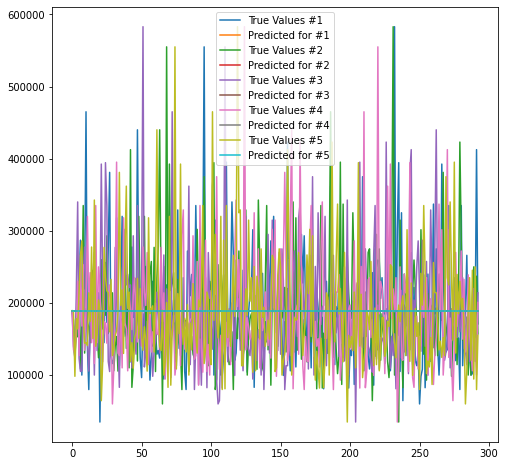

In [587]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for i in range(len(reals)):
    plt.plot(reals[i], label=f"True Values #{i+1}")
    plt.plot(preds[i], label=f"Predicted for #{i+1}")
plt.legend()